In [1]:
#Import libraries
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../ML-Custom-Functions')
import os
from CustomFunctions import *
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [2]:
#import datasets
train = pd.read_csv('store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('store-sales-time-series-forecasting/test.csv')
holidays_events = pd.read_csv('store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('store-sales-time-series-forecasting/oil.csv')
stores = pd.read_csv('store-sales-time-series-forecasting/stores.csv')
transactions = pd.read_csv('store-sales-time-series-forecasting/transactions.csv')

dataSetList = [train,test,holidays_events,oil,stores,transactions]

features selected: ['family']
<class 'list'>
       family
0  AUTOMOTIVE
1   BABY CARE
2      BEAUTY
3   BEVERAGES
4       BOOKS
Total number of rows: 3000888
family    object
dtype: object
Feature: family---------Type: object
family(33 unique values:)
AUTOMOTIVE: 90936
HOME APPLIANCES: 90936
SCHOOL AND OFFICE SUPPLIES: 90936
PRODUCE: 90936
PREPARED FOODS: 90936
POULTRY: 90936
PLAYERS AND ELECTRONICS: 90936
PET SUPPLIES: 90936
PERSONAL CARE: 90936
MEATS: 90936
MAGAZINES: 90936
...more than 10 unique value detected, consider feature type conversion
features selected: ['family']
<class 'list'>


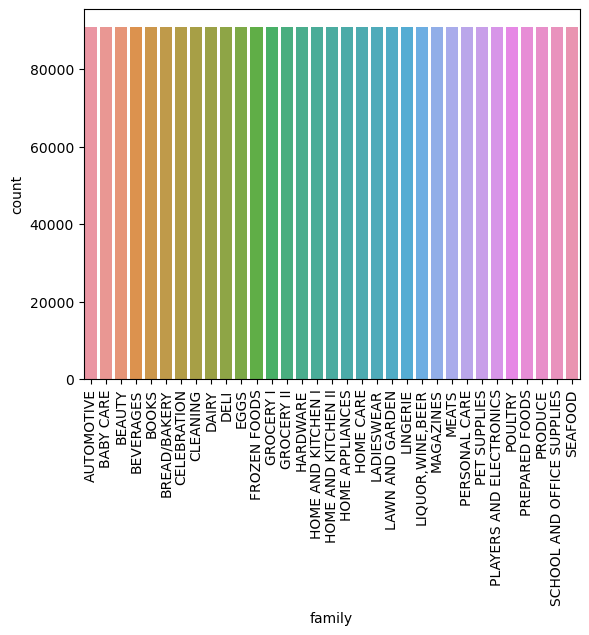

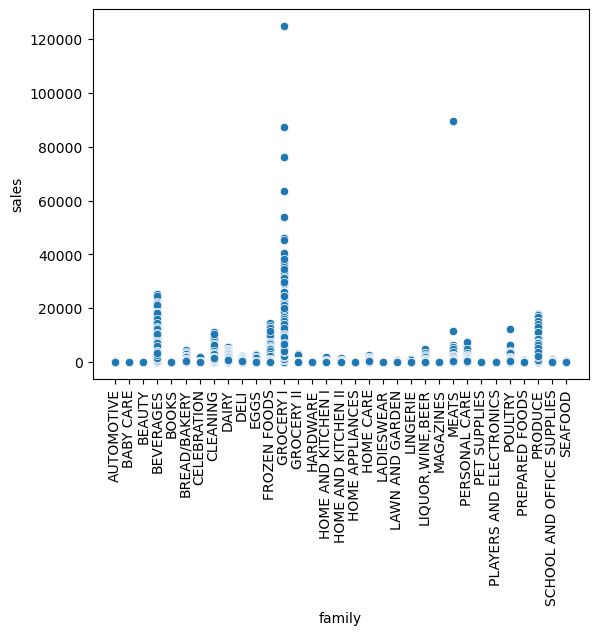

In [3]:
showDataInfo(train,features_to_display = 'family', display_data_frame = True, show_data_details=True,show_graph=True,classification_or_regression='regression',output='sales')

In [4]:
for table in dataSetList:
    showDataInfo(table,features_to_display = 'All', display_data_frame = True, show_data_details=True)

features selected: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
<class 'list'>
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
Total number of rows: 3000888
id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
Feature: id---------Type: int64
id: Max:3000887, Min:0, Median:1500443.500 Mean:1500443.500, std:866281.892,Skewness:-0.000
mode: 3000888 modes in total
0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64
(-0.5 < skewness < 0.5) -> fairly symmetrical
(-1 < skewness < -0.5) or (0.5 < skewness < 1) -> moderately skewed
(skewness < -1) or ( 1 < skewne

# Merging Tables

In [5]:
trainDf = train.merge(holidays_events,how='left',on='date')
trainDf

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [6]:
trainDf1 = trainDf.merge(oil,how='left',on='date')
trainDf1

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


In [7]:
# renaming the "type" column of stores to "store_type"
stores = stores.rename(columns={"type":"store_type"})

In [8]:
trainDf2 = trainDf1.merge(stores, how='left',on='store_nbr')
trainDf2

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6


In [9]:
trainDf3 = trainDf2.merge(transactions,how='left',on=['date','store_nbr'])
trainDf3

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0


In [10]:
trainDf4=preprocessing(trainDf3,preprocess_type='dataTypeConvert',feature_selected='transferred',convert_to='bool')

Function: preprocessing called
features selected: transferred
<class 'str'>


In [16]:
category_features=['family','type','locale','locale_name','description','city','state','store_type']
trainDf5=preprocessing(trainDf4,preprocess_type='dataTypeConvert',feature_selected=category_features,convert_to='category')

Function: preprocessing called
features selected: ['family', 'type', 'locale', 'locale_name', 'description', 'city', 'state', 'store_type']
<class 'list'>


In [17]:
trainDf6=preprocessing(trainDf5,preprocess_type='dataTypeConvert',feature_selected='date',convert_to='datetime') 

Function: preprocessing called
features selected: date
<class 'str'>


features selected: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'type', 'locale', 'locale_name', 'description', 'transferred', 'dcoilwtico', 'city', 'state', 'store_type', 'cluster', 'transactions']
<class 'list'>
   id       date  store_nbr      family  sales  onpromotion     type  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Holiday   
1   1 2013-01-01          1   BABY CARE    0.0            0  Holiday   
2   2 2013-01-01          1      BEAUTY    0.0            0  Holiday   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Holiday   
4   4 2013-01-01          1       BOOKS    0.0            0  Holiday   

     locale locale_name         description  transferred  dcoilwtico   city  \
0  National     Ecuador  Primer dia del ano        False         NaN  Quito   
1  National     Ecuador  Primer dia del ano        False         NaN  Quito   
2  National     Ecuador  Primer dia del ano        False         NaN  Quito   
3  National     Ecua

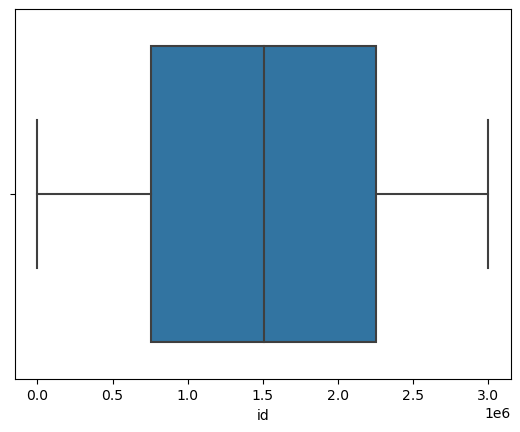

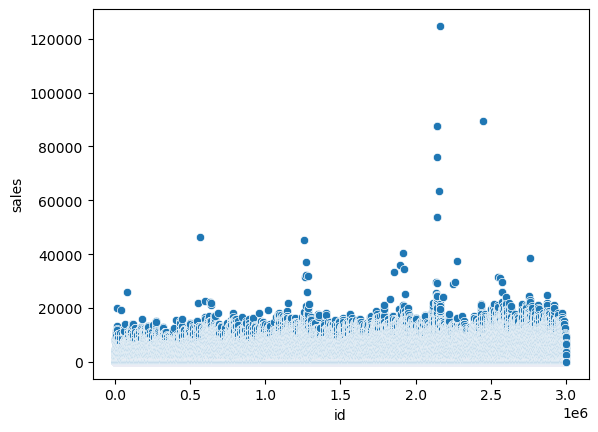

feature is a number


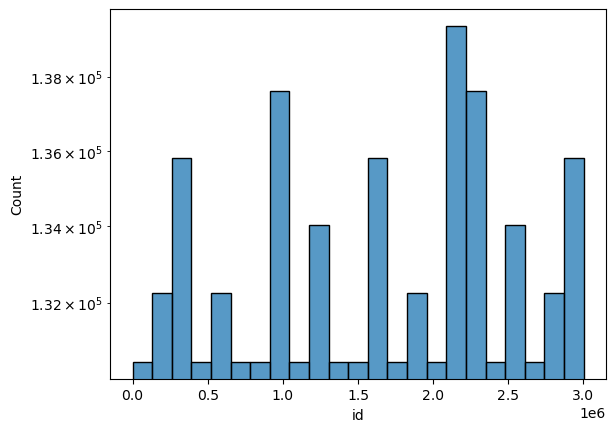

Feature: date---------Type: datetime64[ns]
Oldest Date: 2013-01-01 00:00:00
Newest Date: 2017-08-15 00:00:00
features selected: ['date']
<class 'list'>


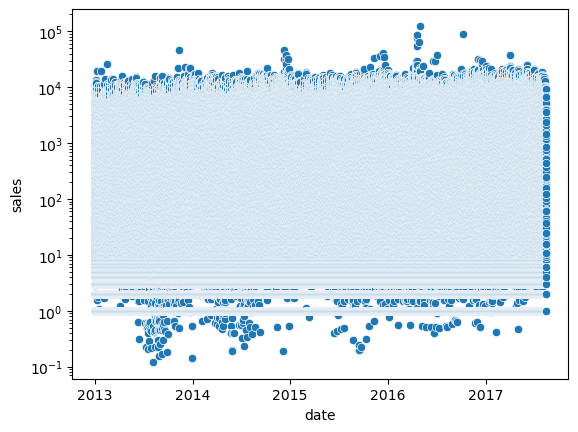

Feature: store_nbr---------Type: int64
store_nbr: Max:54, Min:1, Median:27.500 Mean:27.500, std:15.586,Skewness:0.000
mode: 54 modes in total
0    1
1    2
2    3
3    4
4    5
Name: store_nbr, dtype: int64
(-0.5 < skewness < 0.5) -> fairly symmetrical
(-1 < skewness < -0.5) or (0.5 < skewness < 1) -> moderately skewed
(skewness < -1) or ( 1 < skewness) -> highly skewed
features selected: ['store_nbr']
<class 'list'>


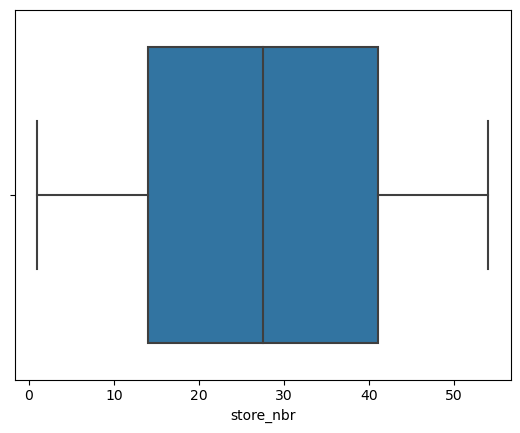

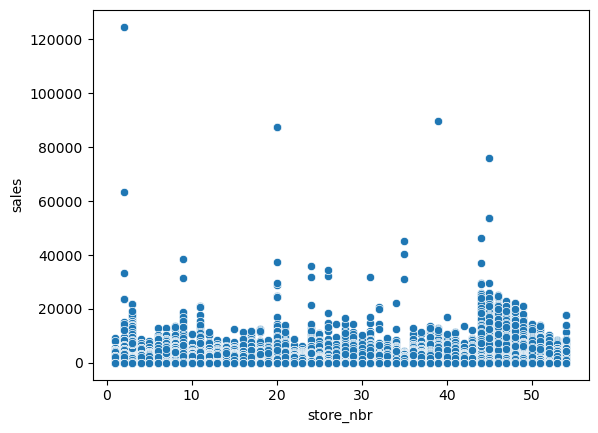

feature is a number


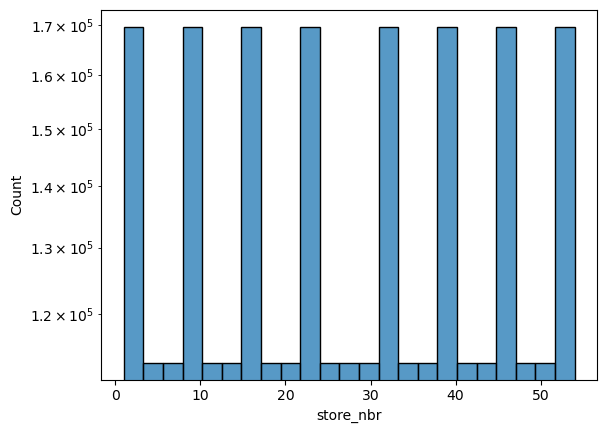

Feature: family---------Type: category
33 unique values:)
AUTOMOTIVE                    92556
HOME APPLIANCES               92556
SCHOOL AND OFFICE SUPPLIES    92556
PRODUCE                       92556
PREPARED FOODS                92556
POULTRY                       92556
PLAYERS AND ELECTRONICS       92556
PET SUPPLIES                  92556
PERSONAL CARE                 92556
MEATS                         92556
MAGAZINES                     92556
LIQUOR,WINE,BEER              92556
LINGERIE                      92556
LAWN AND GARDEN               92556
LADIESWEAR                    92556
HOME CARE                     92556
HOME AND KITCHEN II           92556
BABY CARE                     92556
HOME AND KITCHEN I            92556
HARDWARE                      92556
GROCERY II                    92556
GROCERY I                     92556
FROZEN FOODS                  92556
EGGS                          92556
DELI                          92556
DAIRY                         92556
CLEANI

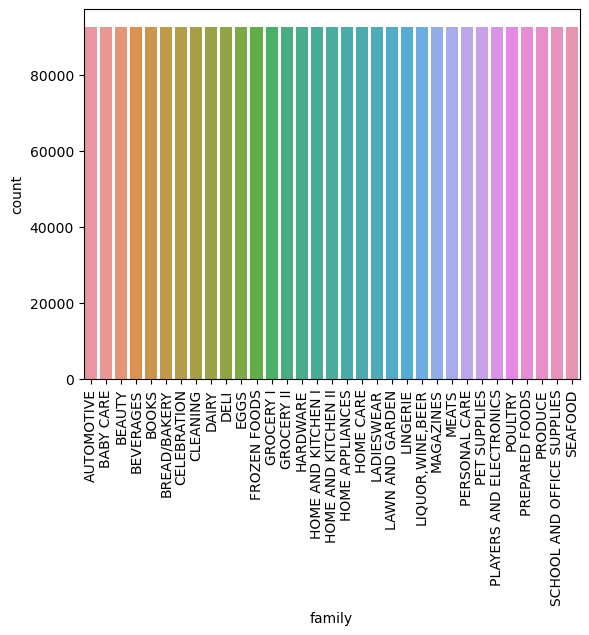

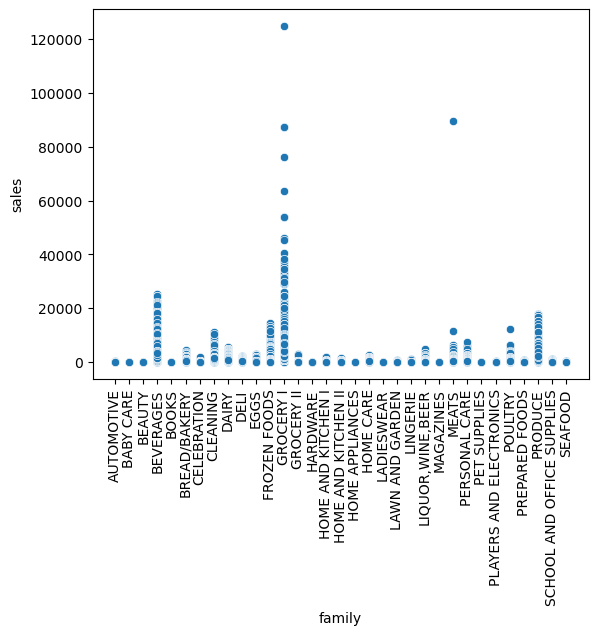

Feature: sales---------Type: float64
sales: Max:124717.0, Min:0.0, Median:11.000 Mean:359.021, std:1107.286,Skewness:7.500
mode: 1 modes in total
0    0.0
Name: sales, dtype: float64
(-0.5 < skewness < 0.5) -> fairly symmetrical
(-1 < skewness < -0.5) or (0.5 < skewness < 1) -> moderately skewed
(skewness < -1) or ( 1 < skewness) -> highly skewed
features selected: ['sales']
<class 'list'>


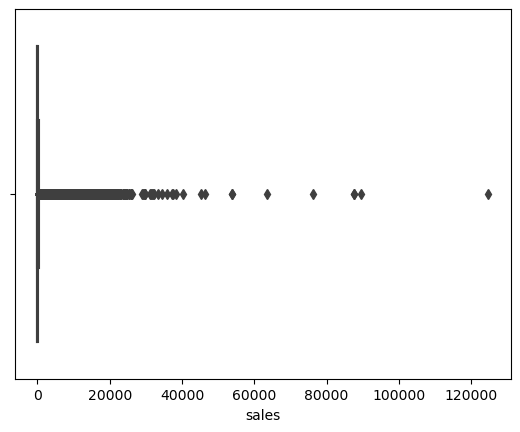

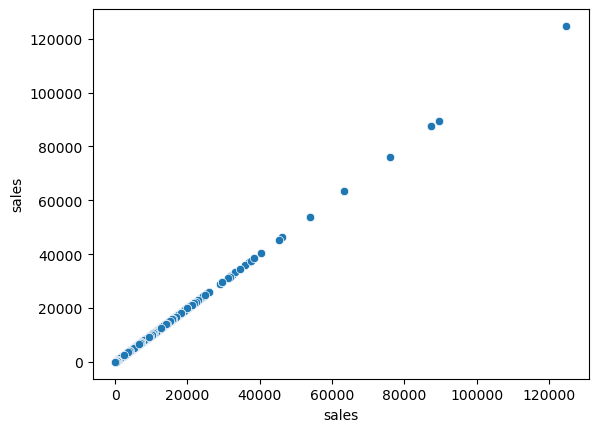

feature is a number


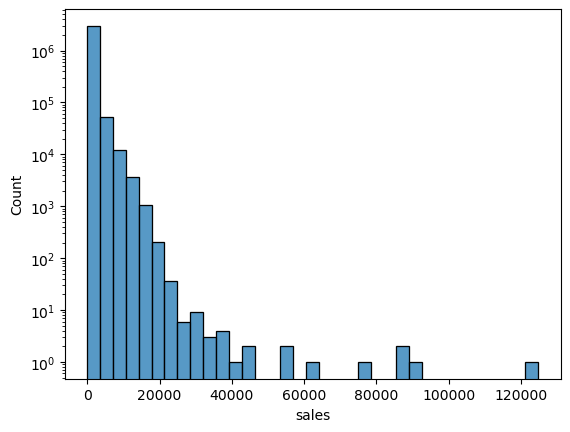

Feature: onpromotion---------Type: int64
onpromotion: Max:741, Min:0, Median:0.000 Mean:2.617, std:12.255,Skewness:11.300
mode: 1 modes in total
0    0
Name: onpromotion, dtype: int64
(-0.5 < skewness < 0.5) -> fairly symmetrical
(-1 < skewness < -0.5) or (0.5 < skewness < 1) -> moderately skewed
(skewness < -1) or ( 1 < skewness) -> highly skewed
features selected: ['onpromotion']
<class 'list'>


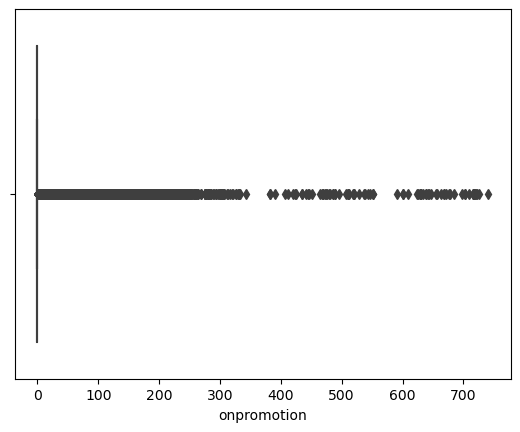

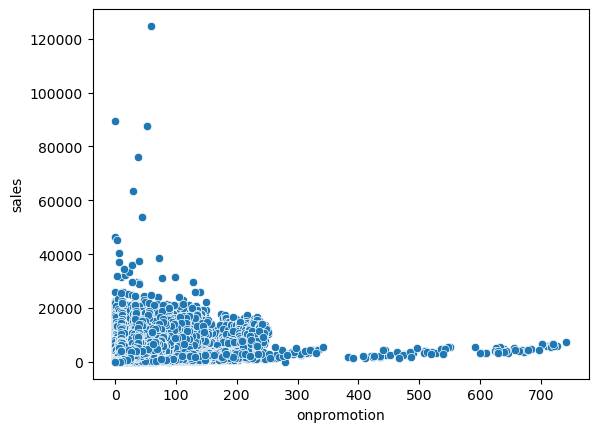

feature is a number


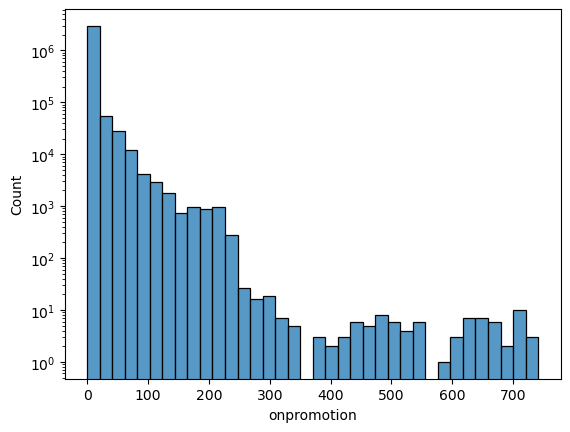

Feature: type---------Type: object
type: contains 2551824 out of 3054348 missing values (0.835%, needs handling

type(7 unique values:)
NaN: 2551824
Holiday: 304722
Event: 99792
Additional: 67716
Transfer: 16038
Work Day: 8910
Bridge: 5346
features selected: ['type']
<class 'list'>


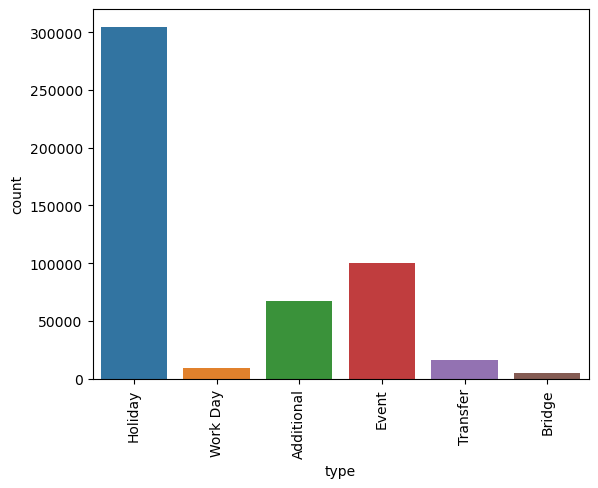

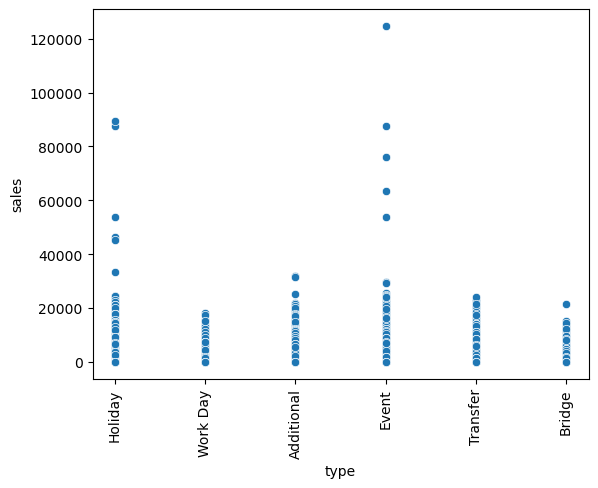

Feature: locale---------Type: category
locale: contains 2551824 out of 3054348 missing values (0.835%, needs handling

4 unique values:)
NaN: 2551824
National    261954
Local       208494
Regional     32076
Name: locale, dtype: int64
features selected: ['locale']
<class 'list'>


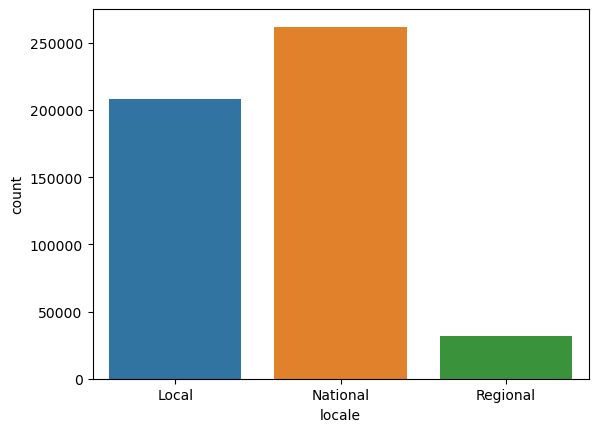

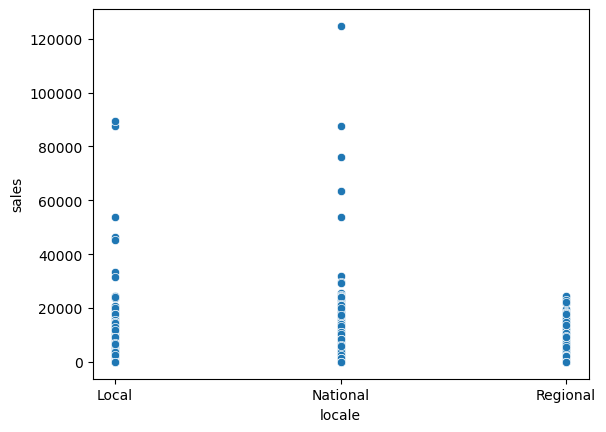

Feature: locale_name---------Type: category
locale_name: contains 2551824 out of 3054348 missing values (0.835%, needs handling

25 unique values:)
NaN: 2551824
Ecuador                           261954
Guayaquil                          19602
Riobamba                           17820
Guaranda                           16038
Latacunga                          16038
Ambato                             14256
Quito                              14256
Cuenca                             10692
Machala                             8910
Santo Domingo                       8910
Puyo                                8910
Manta                               8910
Libertad                            8910
Cayambe                             8910
Imbabura                            8910
Esmeraldas                          8910
El Carmen                           8910
Cotopaxi                            8910
Loja                                7128
Ibarra                              7128
Quevedo            

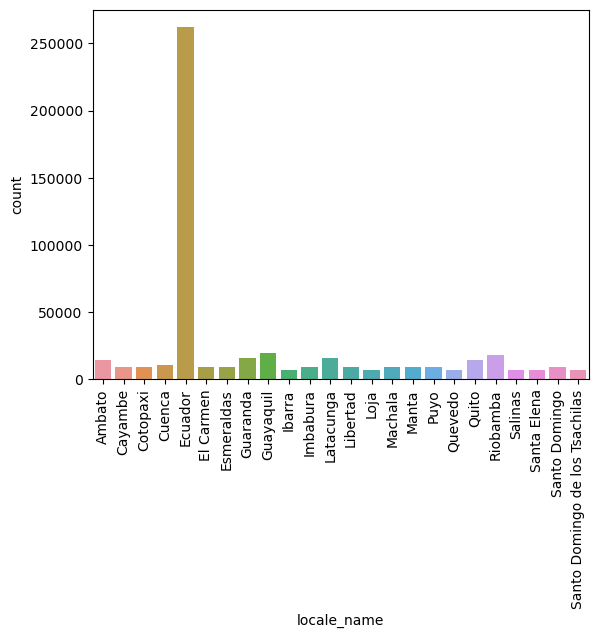

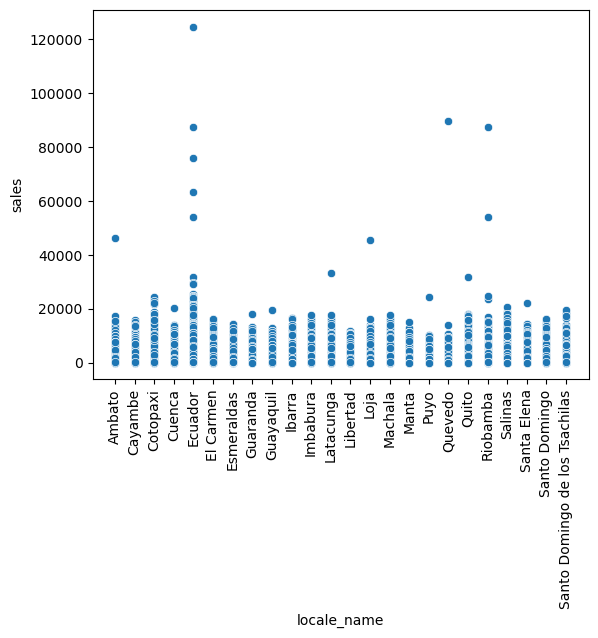

Feature: description---------Type: category
description: contains 2551824 out of 3054348 missing values (0.835%, needs handling

102 unique values:)
NaN: 2551824
Carnaval                         17820
Fundacion de Cuenca              10692
Batalla de Pichincha              8910
Dia de la Madre-1                 8910
Provincializacion de Imbabura     8910
                                 ...  
Terremoto Manabi+14               1782
Terremoto Manabi+15               1782
Terremoto Manabi+16               1782
Terremoto Manabi+17               1782
Puente Primer dia del ano         1782
Name: description, Length: 101, dtype: int64
features selected: ['description']
<class 'list'>


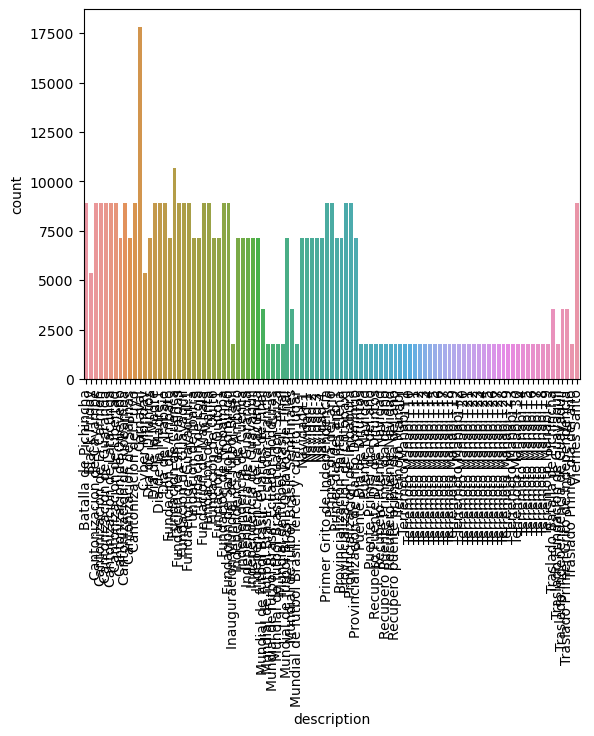

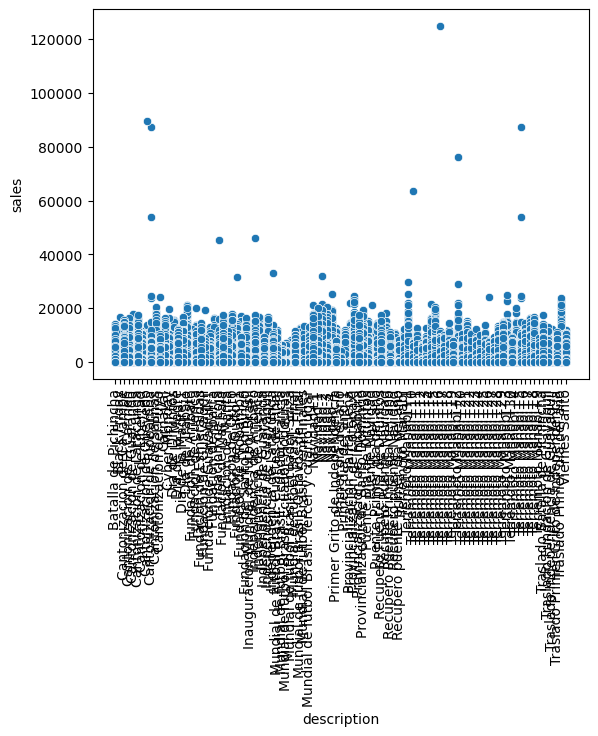

Feature: transferred---------Type: bool
2 unique values:)
True     2567862
False     486486
Name: transferred, dtype: int64
features selected: ['transferred']
<class 'list'>


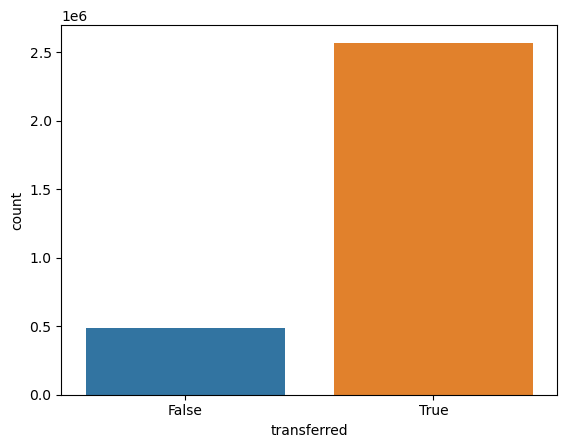

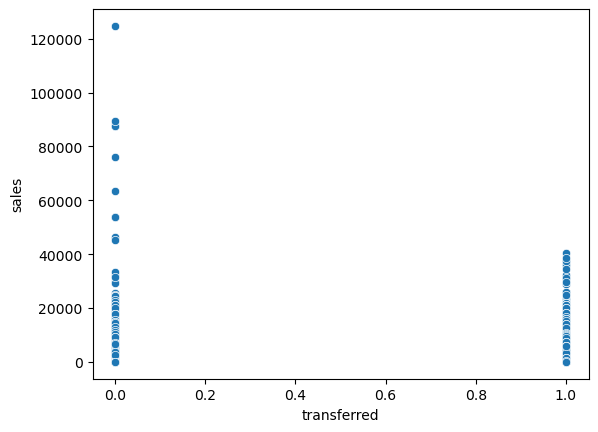

Feature: dcoilwtico---------Type: float64
dcoilwtico: contains 955152 out of 3054348 missing values (0.313%, needs handling

dcoilwtico: Max:110.62, Min:26.19, Median:53.430 Mean:68.016, std:25.691,Skewness:0.300
mode: 7 modes in total
0    46.02
1    47.72
2    60.01
3    93.12
4    95.25
Name: dcoilwtico, dtype: float64
(-0.5 < skewness < 0.5) -> fairly symmetrical
(-1 < skewness < -0.5) or (0.5 < skewness < 1) -> moderately skewed
(skewness < -1) or ( 1 < skewness) -> highly skewed
features selected: ['dcoilwtico']
<class 'list'>


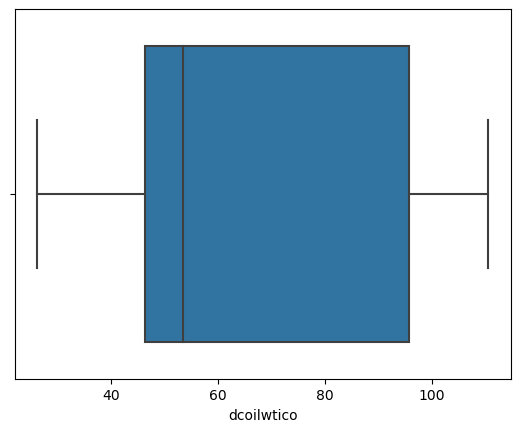

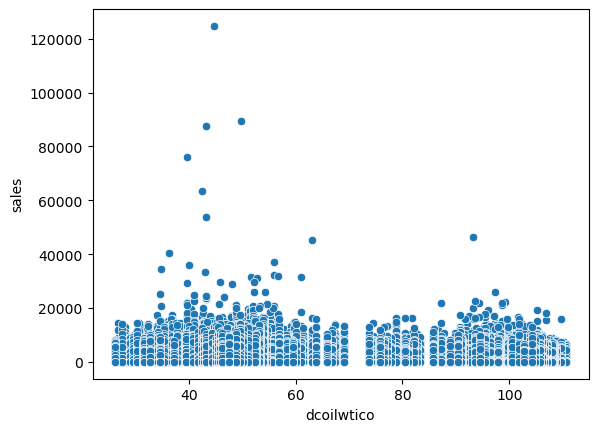

feature is a number


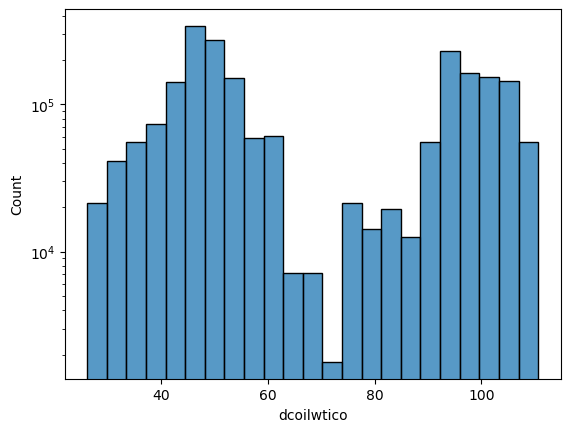

Feature: city---------Type: category
22 unique values:)
Quito            1018116
Guayaquil         452496
Santo Domingo     169686
Cuenca            169686
Manta             113124
Machala           113124
Latacunga         113124
Ambato            113124
Guaranda           56562
Ibarra             56562
Esmeraldas         56562
Babahoyo           56562
Loja               56562
El Carmen          56562
Daule              56562
Playas             56562
Puyo               56562
Quevedo            56562
Cayambe            56562
Riobamba           56562
Salinas            56562
Libertad           56562
Name: city, dtype: int64
features selected: ['city']
<class 'list'>


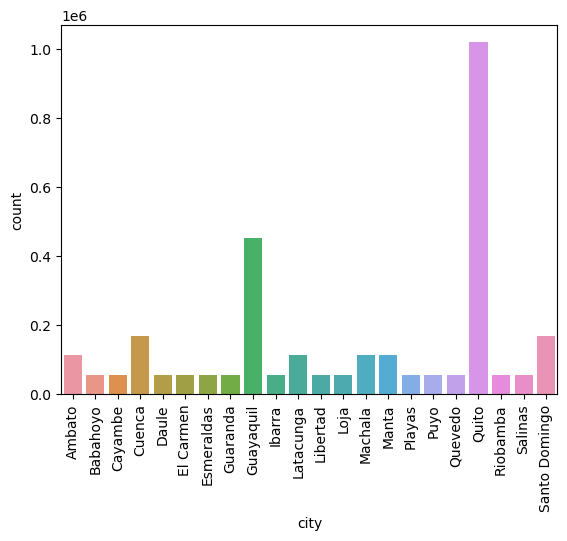

KeyboardInterrupt: 

In [13]:
showDataInfo(trainDf6,features_to_display = 'All',display_data_frame = True,show_data_details=True,show_graph=True,classification_or_regression='regression',output='sales',set_yscale='log')

# Missing Value handling

In [18]:
trainDf7 = preprocessing(dataframe=trainDf6, preprocess_type='handleMissingValue',feature_selected='type',missing_value_handle='fillna',replace_value='Non-Holiday')

Function: preprocessing called
features selected: type
<class 'str'>


In [19]:
showDataInfo(trainDf7,features_to_display='type', display_data_frame=True,show_data_details=True)


features selected: ['type']
<class 'list'>
      type
0  Holiday
1  Holiday
2  Holiday
3  Holiday
4  Holiday
Total number of rows: 3054348
type    category
dtype: object
Feature: type---------Type: category
type: contains 2551824 out of 3054348 missing values (0.835%, needs handling

7 unique values:)
NaN: 2551824
Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: type, dtype: int64


##### 